#### Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych o Titanicu

In [196]:
attribute_names = []
with open("Zbiór danych Titanic.arff.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        if line.lower().startswith("@attribute"):
            attribute_name = line.split()[1].strip("'")
            attribute_names.append(attribute_name)

titanic_data = pd.read_csv(
    "Zbiór danych Titanic.arff.txt",
    skiprows=17,
    names=attribute_names,
    na_values=["?"])


## Analiza Wartości brakujących danych 

### Wartości brakujące - ilość brakujących danych oraz ich cześć procentowa per atrybut (kolumna)

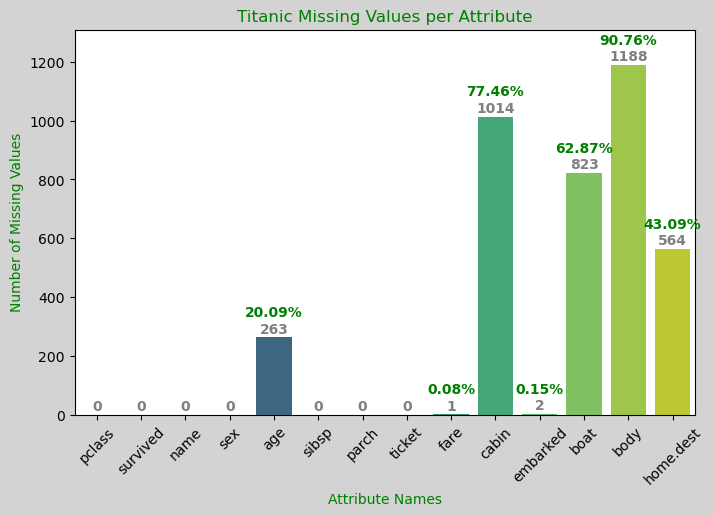

In [197]:
null_counts = titanic_data.isnull().sum()
nullValues_percent = titanic_data.isnull().mean() * 100

plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=null_counts.index,
    y=null_counts.values,
    palette="viridis",
    hue=null_counts.index)
ax.set_facecolor('white')
for i, v in enumerate(null_counts.values):
    ax.text(
        i,
        v + 5,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='grey')
for i, v in enumerate(nullValues_percent.values):
    if v > 0:
        ax.text(i,
                null_counts.iloc[i] + 60,
                str(format(float(v),
                           ".2f")) + "%",
                ha='center',
                va='bottom',
                fontweight='bold',
                color='green')
    else:
        continue

plt.ylim(0, len(titanic_data))
plt.title("Titanic Missing Values per Attribute", color='green')
plt.xlabel("Attribute Names", color='green')
plt.ylabel("Number of Missing Values", color='green')
plt.xticks(rotation=45)
plt.show()


### *age* : **wiek** - 20.09% (263) brakujących danych

#### Wnioski:
Brakujące dane w kolumnie 'age' są zależne od kilku czynników.
- Przeżycie: Osoby, które nie przeżyły (survived = 0), mają więcej brakujących danych (190 przypadków) niż osoby, które przeżyły (73 przypadki). Sugeruje to, że brak danych może być związany z osobami, które nie przeżyły katastrofy.
- Klasa: Najwięcej brakujących danych występuje w klasie 3 (208 przypadków), następnie w klasie 1 (39 przypadków), a najmniej w klasie 2 (16 przypadków). Może to wskazywać na problemy z rejestracją danych wśród pasażerów klasy 3.
- Płeć: W przypadku mężczyzn brakujących danych jest więcej (185 przypadków) w porównaniu do kobiet (78 przypadków). Może to sugerować, że mężczyźni częściej mieli brakujące dane o wieku.

#### Typ brakujących danych:

Brakujące dane w kolumnie 'age' mają charakter MAR (Missing At Random). Oznacza to, że brak danych jest związany z innymi zmiennymi, takimi jak płeć, klasa czy przeżycie, ale niekoniecznie z samym wiekiem. Zatem brakujące dane nie są całkowicie losowe, lecz mogą wynikać z pewnych zależności.

#### Postępowanie z brakującymi danymi:

Imputacja: Najlepszym podejściem jest imputacja brakujących wartości na podstawie innych dostępnych zmiennych, takich jak klasa pasażera czy płeć. Można użyć średniej, mediany lub najczęstszej wartości w danej grupie (np. imputacja średnim wiekiem dla każdej klasy lub płci).

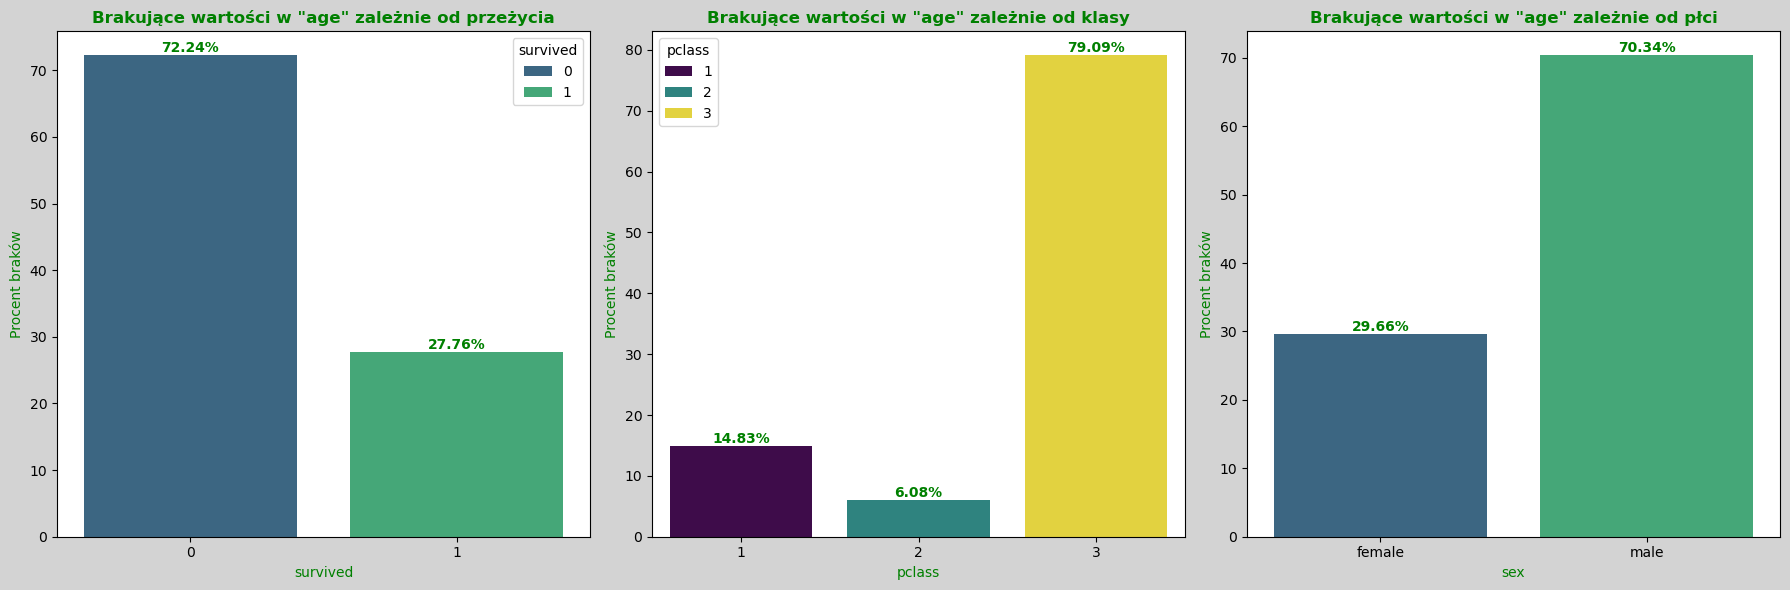

Brakujące wartości w 'age' zależnie od przeżycia:
przeżyli =  73
nie przeżyli =  190

Brakujące wartości w 'age' zależnie od klasy:
1 klasa =  39
2 klasa =  16
3 klasa =  208

Brakujące wartości w 'age' zależnie od płci:
female =  78
male =  185


In [198]:
ageNullGrBySurvived = titanic_data.groupby(
    'survived')['age'].apply(lambda x: x.isnull().sum())
ageNullGrByPclass = titanic_data.groupby(
    'pclass')['age'].apply(lambda x: x.isnull().sum())
ageNullGrBySex = titanic_data.groupby(
    'sex')['age'].apply(lambda x: x.isnull().sum())

data_dict = {
    'Brakujące wartości w "age" zależnie od przeżycia': (
        ageNullGrBySurvived.index,
        ageNullGrBySurvived.values),
    'Brakujące wartości w "age" zależnie od klasy': (
        ageNullGrByPclass.index,
        ageNullGrByPclass.values),
    'Brakujące wartości w "age" zależnie od płci': (
        ageNullGrBySex.index,
        ageNullGrBySex.values)}
fig, ax = plt.subplots(1, 3, figsize=(18, 6), facecolor='lightgrey')

for i, (title, (x_vals, y_vals)) in enumerate(data_dict.items()):
    y_vals = y_vals / null_counts['age'] * 100
    sns.barplot(x=x_vals, y=y_vals, ax=ax[i], palette='viridis', hue=x_vals)
    for j, v in enumerate(y_vals):
        ax[i].text(
            j,
            v + 0.002,
            f"{v:.2f}%",
            ha='center',
            va='bottom',
            color='green',
            fontweight='bold')
    ax[i].set_title(title, color='green', fontweight='bold')
    ax[i].set_xlabel(
        x_vals.name if hasattr(
            x_vals,
            'name') else "Grupa",
        color='green')
    ax[i].set_ylabel("Procent braków", color='green')

plt.tight_layout()
plt.show()

print("Brakujące wartości w 'age' zależnie od przeżycia:")
print('przeżyli = ', ageNullGrBySurvived[1])
print('nie przeżyli = ', ageNullGrBySurvived[0])
print("\nBrakujące wartości w 'age' zależnie od klasy:")
print('1 klasa = ', ageNullGrByPclass[1])
print('2 klasa = ', ageNullGrByPclass[2])
print('3 klasa = ', ageNullGrByPclass[3])
print("\nBrakujące wartości w 'age' zależnie od płci:")
print('female = ', ageNullGrBySex['female'])
print('male = ', ageNullGrBySex['male'])


### *cabin* : **numer kabiny** - 77.46% (1014) brakujących danych

#### Wnioski:
Brakujące dane w kolumnie **'cabin'** są zależne od kilku czynników:
- **Przeżycie**: Osoby, które **nie przeżyły** (707 przypadków) mają zdecydowanie więcej brakujących danych w porównaniu do osób, które **przeżyły** (307 przypadków). Może to wskazywać na to, że dane dotyczące kabiny były mniej dostępne lub trudniejsze do odzyskania w przypadku osób, które zginęły.
- **Klasa**: Większość brakujących danych występuje w **klasie 3** (693 przypadki), co może sugerować, że pasażerowie tej klasy mieli mniej kompletnych informacji dotyczących kabiny. W **klasie 2** braków jest 254, a w **klasie 1** tylko 67. Może to wynikać z lepszej dokumentacji pasażerów wyższych klas.
- **Płeć**: W przypadku **mężczyzn** brakujących danych jest więcej (689 przypadków) niż w przypadku **kobiet** (325 przypadków). Może to wskazywać na różnice w gromadzeniu danych w zależności od płci.

#### Typ brakujących danych:
Brakujące dane w kolumnie **'cabin'** mają charakter **MAR** (Missing At Random). Oznacza to, że brak danych jest zależny od innych zmiennych (np. płeć, klasa, przeżycie), ale nie jest związany bezpośrednio z wartością samej zmiennej (czyli kabiną). Brakujące dane mogą być wynikiem różnych czynników, takich jak różnice w rejestracji danych.

#### Postępowanie z brakującymi danymi:
- **Imputacja**: Imputacja brakujących danych może być trudna ze względu na specyficzny charakter tej zmiennej, ale warto spróbować imputować dane na podstawie klasy, płci lub przeżycia. Można spróbować użyć **najczęstszej kabiny** dla danej grupy lub przypisać losowe dane na podstawie rozkładu istniejących kabin w tej samej klasie.
- **Usunięcie danych**: Można także rozważyć usunięcie wierszy z brakującymi wartościami, ale może to prowadzić do utraty cennych informacji, zwłaszcza w klasie 3.


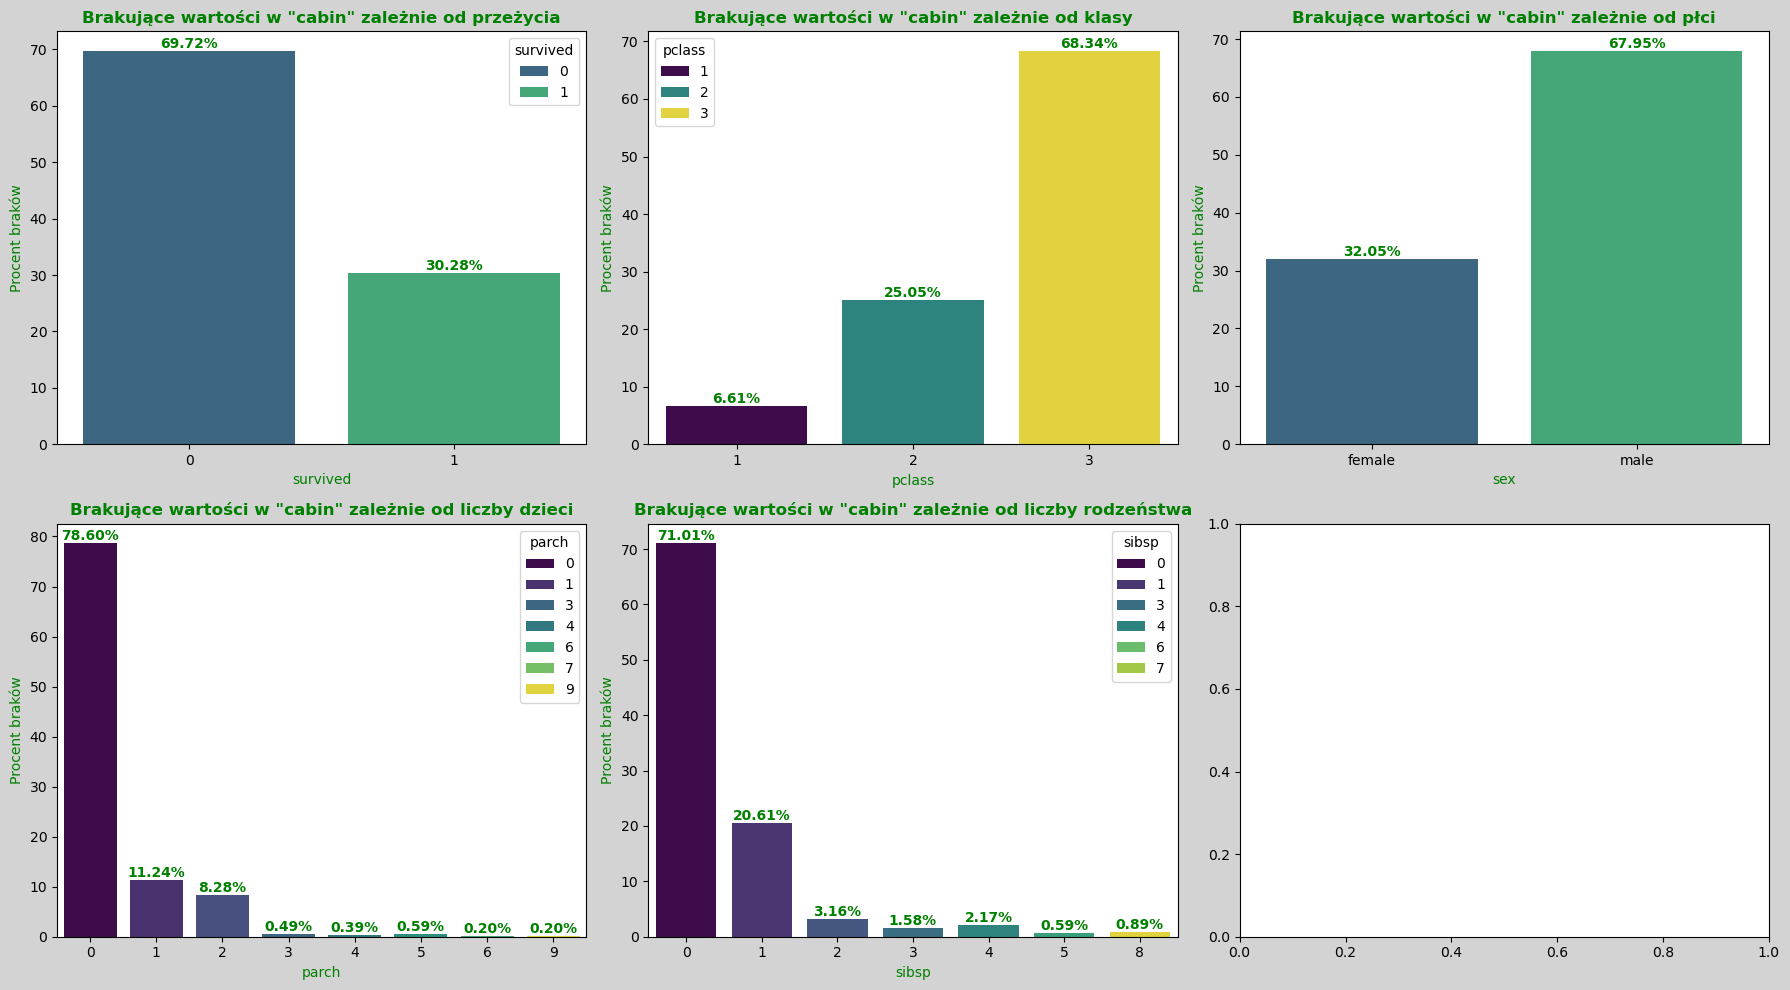

Brakujące wartości w 'cabin' zależnie od przeżycia:
przeżyli =  307
nie przeżyli =  707

Brakujące wartości w 'cabin' zależnie od klasy:
1 klasa =  67
2 klasa =  254
3 klasa =  693

Brakujące wartości w 'cabin' zależnie od płci:
female =  325
male =  689


In [199]:
cabinNullGrBySurvived = titanic_data.groupby(
    'survived')['cabin'].apply(lambda x: x.isnull().sum())
cabinNullGrByPclass = titanic_data.groupby(
    'pclass')['cabin'].apply(lambda x: x.isnull().sum())
cabinNullGrBySex = titanic_data.groupby(
    'sex')['cabin'].apply(lambda x: x.isnull().sum())
cabinNullGrByParch = titanic_data.groupby(
    'parch')['cabin'].apply(lambda x: x.isnull().sum())
cabinNullGrBySibsp = titanic_data.groupby(
    'sibsp')['cabin'].apply(lambda x: x.isnull().sum())

data_dict = {
    'Brakujące wartości w "cabin" zależnie od przeżycia': (
        cabinNullGrBySurvived.index,
        cabinNullGrBySurvived.values),
    'Brakujące wartości w "cabin" zależnie od klasy': (
        cabinNullGrByPclass.index,
        cabinNullGrByPclass.values),
    'Brakujące wartości w "cabin" zależnie od płci': (
        cabinNullGrBySex.index,
        cabinNullGrBySex.values),
    'Brakujące wartości w "cabin" zależnie od liczby dzieci': (
        cabinNullGrByParch.index,
        cabinNullGrByParch.values),
    'Brakujące wartości w "cabin" zależnie od liczby rodzeństwa': (
        cabinNullGrBySibsp.index,
        cabinNullGrBySibsp.values)}
fig, ax = plt.subplots(2, 3, figsize=(18, 10), facecolor='lightgrey')

for i, (title, (x_vals, y_vals)) in enumerate(data_dict.items()):
    row, col = divmod(i, 3)
    if row == 1 and col == 2:
        break
    y_vals = y_vals / null_counts['cabin'] * 100
    sns.barplot(x=x_vals, y=y_vals,
                ax=ax[row, col], palette='viridis', hue=x_vals)
    for j, v in enumerate(y_vals):
        ax[row,
           col].text(j,
                     v + 0.002,
                     f"{v:.2f}%",
                     ha='center',
                     va='bottom',
                     color='green',
                     fontweight='bold')
    ax[row, col].set_title(title, color='green', fontweight='bold')
    ax[row, col].set_xlabel(x_vals.name if hasattr(
        x_vals, 'name') else "Grupa", color='green')
    ax[row, col].set_ylabel("Procent braków", color='green')


plt.tight_layout()
plt.show()

print("Brakujące wartości w 'cabin' zależnie od przeżycia:")
print('przeżyli = ', cabinNullGrBySurvived[1])
print('nie przeżyli = ', cabinNullGrBySurvived[0])
print("\nBrakujące wartości w 'cabin' zależnie od klasy:")
print('1 klasa = ', cabinNullGrByPclass[1])
print('2 klasa = ', cabinNullGrByPclass[2])
print('3 klasa = ', cabinNullGrByPclass[3])
print("\nBrakujące wartości w 'cabin' zależnie od płci:")
print('female = ', cabinNullGrBySex['female'])
print('male = ', cabinNullGrBySex['male'])


### *boat* : **numer łodzi ratunkowej** - 62.87% (823) brakujących danych

#### Wnioski:
Brakujące dane w kolumnie **'boat'** (numer łodzi ratunkowej) są zależne od kilku czynników:
- **Przeżycie**: Zdecydowana większość brakujących danych dotyczy osób, które **nie przeżyły** (800 przypadków), w porównaniu do osób, które **przeżyły** (23 przypadki). To może sugerować, że osoby, które zginęły, nie dotarły na łódź ratunkową, a jej numery zostawały pszypisywane dopiero po akcji ratunkowej, lub też nie wszyscy mieli z góry zagwarantowanej łodzi ratunkowej.
- **Klasa**: Najwięcej brakujących danych występuje w **klasie 3** (536 przypadków), następnie w **klasie 2** (165 przypadków), a najmniej w **klasie 1** (122 przypadki). Może to wskazywać na to, że pasażerowie klasy 3 mieli mniejsze szanse na dostanie się do łodzi ratunkowej, co mogło wpłynąć na mniejszą dostępność tych danych.
- **Płeć**: W przypadku **mężczyzn** brakujących danych jest zdecydowanie więcej (676 przypadków) w porównaniu do **kobiet** (147 przypadków). Może to wskazywać na to, że mężczyźni byli mniej dokumentowani w kontekście przypisania do łodzi ratunkowej.

#### Typ brakujących danych:
Brakujące dane w kolumnie **'boat'** mają charakter **MAR** (Missing At Random). Oznacza to, że brak danych jest zależny od innych zmiennych (np. płeć, klasa, przeżycie), ale nie jest związany bezpośrednio z wartością samego numeru łodzi ratunkowej. Brakujące dane mogą wynikać z różnych czynników, takich jak różnice w szansach na dostęp do łodzi ratunkowych w zależności od klasy czy płci.

#### Postępowanie z brakującymi danymi:
- **Imputacja**: Imputacja brakujących danych na podstawie innych zmiennych, takich jak **przeżycie**, **klasa** czy **płeć**, może być użyteczna. Można spróbować imputować dane na podstawie częstości przypisania do łodzi w danej klasie lub płci.
- **Usunięcie danych**: Usunięcie wierszy z brakującymi wartościami może być rozważane, ale ze względu na dużą liczbę brakujących danych, może to prowadzić do znacznej utraty danych, zwłaszcza w klasie 3.


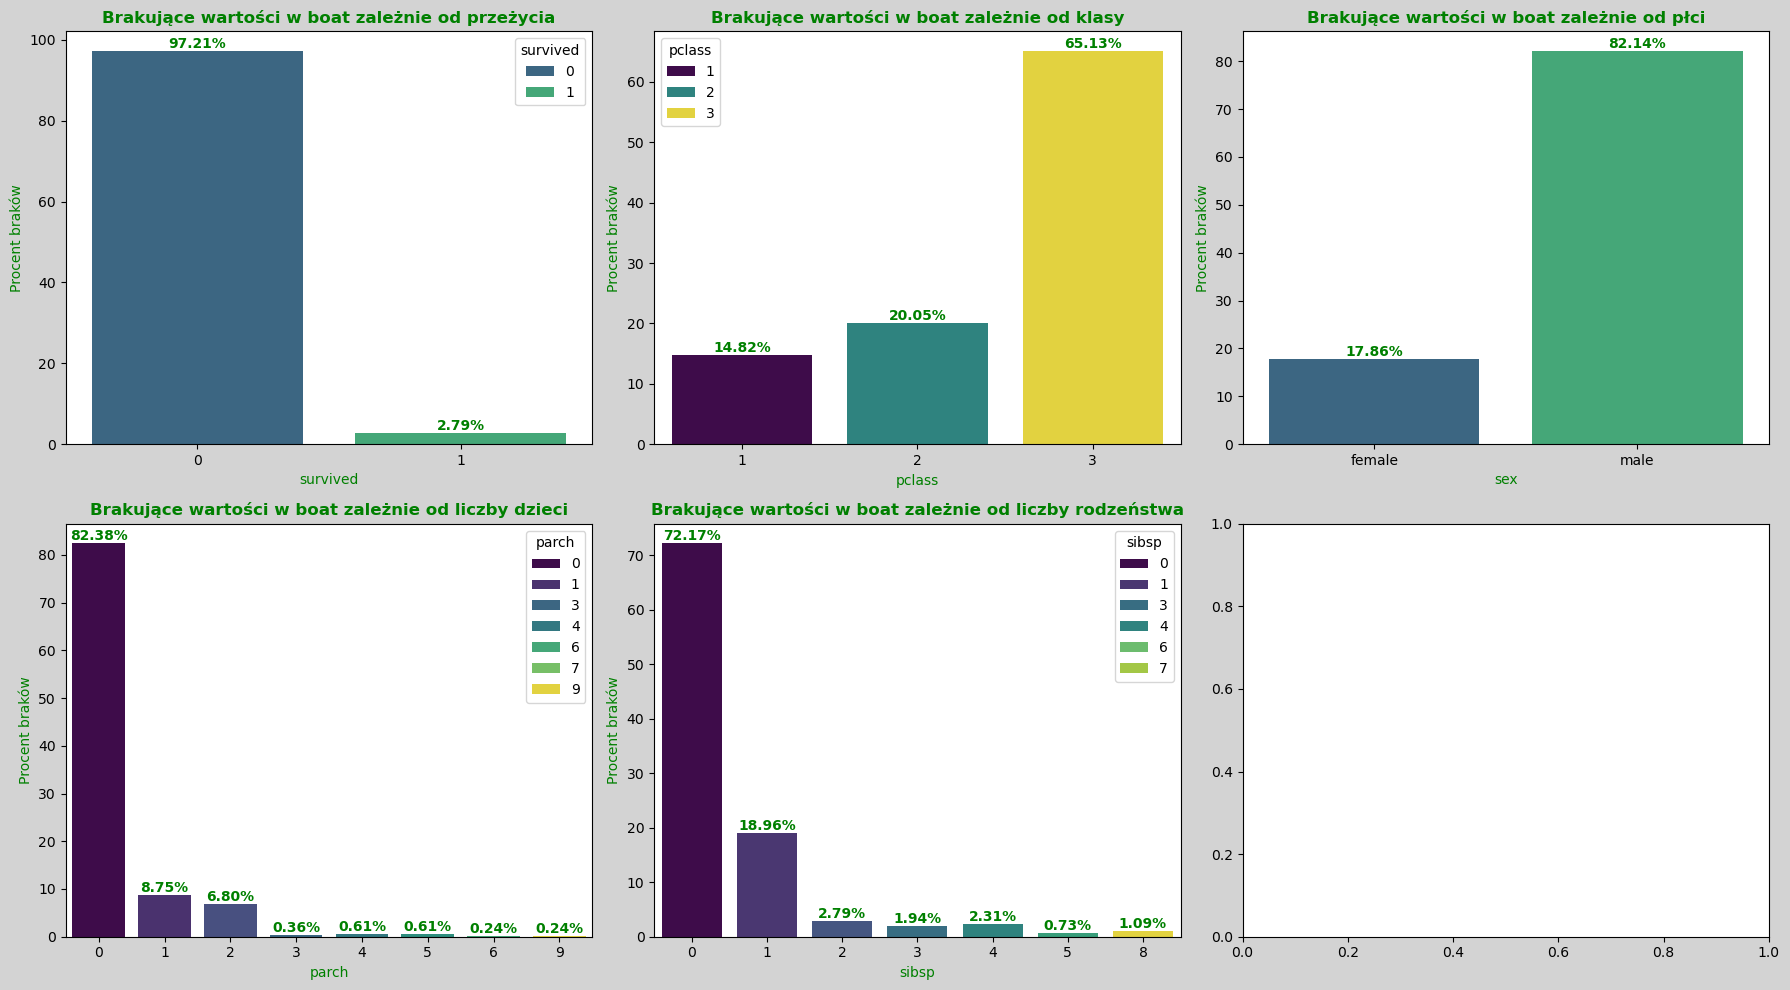

Brakujące wartości w boat zależnie od przeżycia:
przeżyli =  23
nie przeżyli =  800

Brakujące wartości w boat zależnie od klasy:
1 klasa =  122
2 klasa =  165
3 klasa =  536

Brakujące wartości w boat zależnie od płci:
female =  147
male =  676


In [200]:
attrib = 'boat'

NullGrBySurvived = titanic_data.groupby(
    'survived')[attrib].apply(lambda x: x.isnull().sum())
NullGrByPclass = titanic_data.groupby(
    'pclass')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySex = titanic_data.groupby(
    'sex')[attrib].apply(lambda x: x.isnull().sum())
NullGrByParch = titanic_data.groupby(
    'parch')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySibsp = titanic_data.groupby(
    'sibsp')[attrib].apply(lambda x: x.isnull().sum())

data_dict = {
    f'Brakujące wartości w {attrib} zależnie od przeżycia': (
        NullGrBySurvived.index,
        NullGrBySurvived.values),
    f'Brakujące wartości w {attrib} zależnie od klasy': (
        NullGrByPclass.index,
        NullGrByPclass.values),
    f'Brakujące wartości w {attrib} zależnie od płci': (
        NullGrBySex.index,
        NullGrBySex.values),
    f'Brakujące wartości w {attrib} zależnie od liczby dzieci': (
        NullGrByParch.index,
        NullGrByParch.values),
    f'Brakujące wartości w {attrib} zależnie od liczby rodzeństwa': (
        NullGrBySibsp.index,
        NullGrBySibsp.values)}
fig, ax = plt.subplots(2, 3, figsize=(18, 10), facecolor='lightgrey')

for i, (title, (x_vals, y_vals)) in enumerate(data_dict.items()):
    row, col = divmod(i, 3)
    if row == 1 and col == 2:
        break
    y_vals = y_vals / null_counts[attrib] * 100
    sns.barplot(x=x_vals, y=y_vals,
                ax=ax[row, col], palette='viridis', hue=x_vals)
    for j, v in enumerate(y_vals):
        ax[row,
           col].text(j,
                     v + 0.002,
                     f"{v:.2f}%",
                     ha='center',
                     va='bottom',
                     color='green',
                     fontweight='bold')
    ax[row, col].set_title(title, color='green', fontweight='bold')
    ax[row, col].set_xlabel(x_vals.name if hasattr(
        x_vals, 'name') else "Grupa", color='green')
    ax[row, col].set_ylabel("Procent braków", color='green')


plt.tight_layout()
plt.show()

print(f"Brakujące wartości w {attrib} zależnie od przeżycia:")
print('przeżyli = ', NullGrBySurvived[1])
print('nie przeżyli = ', NullGrBySurvived[0])
print(f"\nBrakujące wartości w {attrib} zależnie od klasy:")
print('1 klasa = ', NullGrByPclass[1])
print('2 klasa = ', NullGrByPclass[2])
print('3 klasa = ', NullGrByPclass[3])
print(f"\nBrakujące wartości w {attrib} zależnie od płci:")
print('female = ', NullGrBySex['female'])
print('male = ', NullGrBySex['male'])


### *body* : **numer identyfikacji ciała** - 90.76% (1188) brakujących danych

#### Wnioski:
Brakujące dane w kolumnie **'body'** (numery odnalezionych ciał) są zależne od kilku czynników:
- **Przeżycie**: Większość brakujących danych dotyczy osób, które **nie przeżyły** (688 przypadków), w porównaniu do osób, które **przeżyły** (500 przypadków). Jest to naturalne, ponieważ numery ciał dotyczą tylko osób, które zginęły, co może tłumaczyć brak danych dla osób, które przeżyły.
- **Klasa**: Większość brakujących danych występuje w **klasie 3** (654 przypadki), a najmniej w **klasie 1** (288 przypadków). Może to sugerować, że osoby z klasy 3 były mniej dokumentowane pod względem numerów ciał, co może wynikać z różnych czynników, w tym zorganizowania ratunków.
- **Płeć**: W przypadku **mężczyzn** brakujących danych jest więcej (730 przypadków) w porównaniu do **kobiet** (458 przypadków). Może to wskazywać na różnice w rejestracji danych między płciami, w tym w kontekście ofiar, które zostały odnalezione.

#### Typ brakujących danych:
Brakujące dane w kolumnie **'body'** mają charakter **MNAR** (Missing Not At Random). Oznacza to, że brak danych jest bezpośrednio związany z wartością zmiennej — brak danych dotyczy tylko osób, które nie przeżyły katastrofy. Zatem brakujące dane wynikają z faktu, że tylko zmarli pasażerowie mają przypisany numer ciała.

#### Postępowanie z brakującymi danymi:
- **Imputacja**: Imputacja brakujących danych jest trudna, ponieważ brak danych jest związany z faktorem przeżycia, którego nie można łatwo zastąpić. Można jednak rozważyć wprowadzenie zmiennej wskaźnikowej, informującej, czy pasażer przeżył, co pomoże w dalszych analizach.
- **Usunięcie danych**: Usunięcie wierszy z brakującymi wartościami jest uzasadnione, ponieważ brak danych w tej kolumnie ma bezpośredni związek z przeżyciem. Może to prowadzić do utraty tylko tych danych, które są istotne dla osób, które zginęły.
- **Dodanie zmiennej wskaźnikowej**: Dodanie zmiennej informującej o przeżyciu (np. **"czy przeżył"**) może pomóc w modelowaniu danych, ponieważ brak danych w kolumnie **'body'** wynika bezpośrednio z tego, czy osoba przeżyła katastrofę.


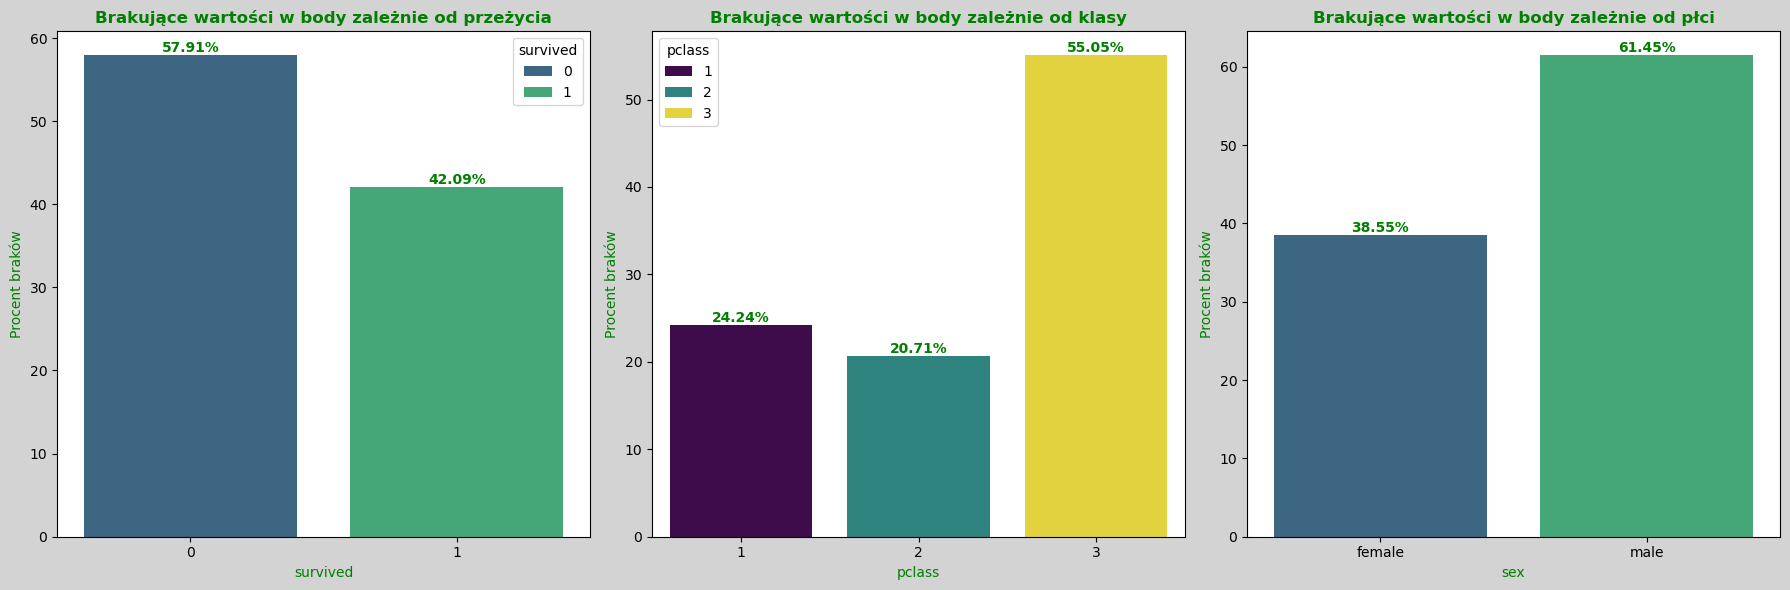

Brakujące wartości w body zależnie od przeżycia:
przeżyli =  500
nie przeżyli =  688

Brakujące wartości w body zależnie od klasy:
1 klasa =  288
2 klasa =  246
3 klasa =  654

Brakujące wartości w body zależnie od płci:
female =  458
male =  730


In [201]:
attrib = 'body'

NullGrBySurvived = titanic_data.groupby(
    'survived')[attrib].apply(lambda x: x.isnull().sum())
NullGrByPclass = titanic_data.groupby(
    'pclass')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySex = titanic_data.groupby(
    'sex')[attrib].apply(lambda x: x.isnull().sum())
NullGrByParch = titanic_data.groupby(
    'parch')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySibsp = titanic_data.groupby(
    'sibsp')[attrib].apply(lambda x: x.isnull().sum())

data_dict = {
    f'Brakujące wartości w {attrib} zależnie od przeżycia': (
        NullGrBySurvived.index,
        NullGrBySurvived.values),
    f'Brakujące wartości w {attrib} zależnie od klasy': (
        NullGrByPclass.index,
        NullGrByPclass.values),
    f'Brakujące wartości w {attrib} zależnie od płci': (
        NullGrBySex.index,
        NullGrBySex.values)}
fig, ax = plt.subplots(1, 3, figsize=(18, 6), facecolor='lightgrey')

for i, (title, (x_vals, y_vals)) in enumerate(data_dict.items()):
    y_v = y_vals / null_counts[attrib] * 100
    sns.barplot(x=x_vals, y=y_v, ax=ax[i], palette='viridis', hue=x_vals)
    for j, v in enumerate(y_v):
        ax[i].text(
            j,
            v + 0.002,
            f"{v:.2f}%",
            ha='center',
            va='bottom',
            color='green',
            fontweight='bold')
    ax[i].set_title(title, color='green', fontweight='bold')
    ax[i].set_xlabel(
        x_vals.name if hasattr(
            x_vals,
            'name') else "Grupa",
        color='green')
    ax[i].set_ylabel("Procent braków", color='green')


plt.tight_layout()
plt.show()

assert NullGrBySurvived[1] == titanic_data[titanic_data['survived'] == 1]['survived'].count(
), "Liczba braku informacji o identyfkacji ciał przeżytych musi być równa liczbie przeżytych"

print(f"Brakujące wartości w {attrib} zależnie od przeżycia:")
print('przeżyli = ', NullGrBySurvived[1])
print('nie przeżyli = ', NullGrBySurvived[0])
print(f"\nBrakujące wartości w {attrib} zależnie od klasy:")
print('1 klasa = ', NullGrByPclass[1])
print('2 klasa = ', NullGrByPclass[2])
print('3 klasa = ', NullGrByPclass[3])
print(f"\nBrakujące wartości w {attrib} zależnie od płci:")
print('female = ', NullGrBySex['female'])
print('male = ', NullGrBySex['male'])


### *home.dest* : **Docelowe miejsce zamieszkania lub podróży** - 43.09% (564) brakujących danych

#### Wnioski:
Brakujące dane w kolumnie **'home.dest'** (kierunek docelowy pasażera) są zależne od kilku czynników:
- **Przeżycie**: Więcej brakujących danych występuje u osób, które **nie przeżyły** (411 przypadków), w porównaniu do osób, które **przeżyły** (153 przypadki). Może to sugerować, że dane dotyczące miejsca przeznaczenia były trudniej dostępne lub mniej dokumentowane dla pasażerów, którzy zginęli.
- **Klasa**: Najwięcej brakujących danych występuje w **klasie 3** (514 przypadków), następnie w **klasie 2** (16 przypadków), a najmniej w **klasie 1** (34 przypadki). Może to sugerować, że pasażerowie klasy 3 byli mniej dobrze dokumentowani pod względem kierunku docelowego, być może ze względu na mniejszą organizację podróży.
- **Płeć**: Więcej brakujących danych występuje w przypadku **mężczyzn** (386 przypadków) w porównaniu do **kobiet** (178 przypadków). Może to wynikać z różnic w sposobie rejestrowania pasażerów, w tym w kontekście ich miejsca docelowego.

#### Typ brakujących danych:
Brakujące dane w kolumnie **'home.dest'** mają charakter **MAR** (Missing At Random). Oznacza to, że brak danych jest zależny od innych zmiennych, takich jak klasa, płeć czy przeżycie, ale nie jest bezpośrednio związany z samą wartością zmiennej (kierunkiem docelowym). Brakujące dane mogą wynikać z różnic w dokumentacji pasażerów w zależności od ich statusu (przeżycie, klasa, płeć).

#### Postępowanie z brakującymi danymi:
- **Imputacja**: Imputacja brakujących danych na podstawie klasy, płci lub przeżycia może być skutecznym podejściem. Można użyć najczęstszych kierunków docelowych w danej klasie lub płci, aby zastąpić brakujące wartości.
- **Usunięcie danych**: Usunięcie wierszy z brakującymi wartościami jest opcją, ale może prowadzić do utraty dużej ilości danych, zwłaszcza w klasie 3, gdzie braków jest najwięcej. Warto rozważyć to tylko w przypadku, gdy brakujące dane stanowią niewielki procent całkowitej liczby obserwacji.


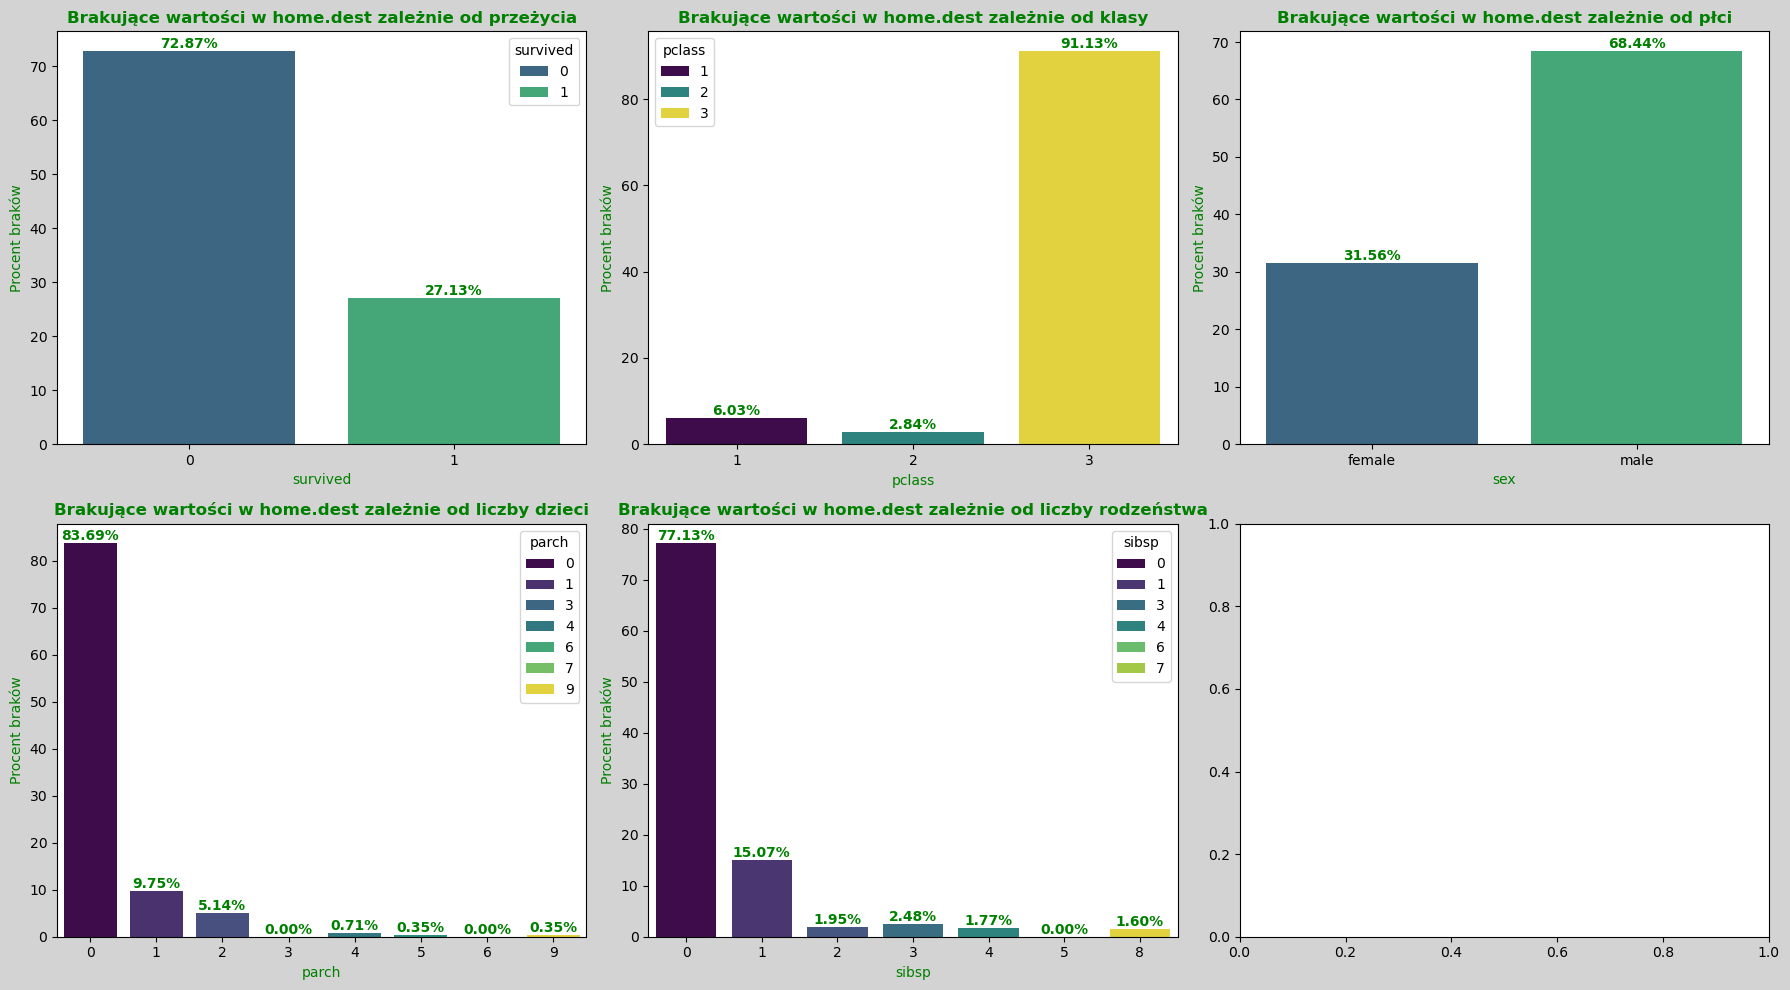

Brakujące wartości w home.dest zależnie od przeżycia:
przeżyli =  153
nie przeżyli =  411

Brakujące wartości w home.dest zależnie od klasy:
1 klasa =  34
2 klasa =  16
3 klasa =  514

Brakujące wartości w home.dest zależnie od płci:
female =  178
male =  386


In [202]:
attrib = 'home.dest'

NullGrBySurvived = titanic_data.groupby(
    'survived')[attrib].apply(lambda x: x.isnull().sum())
NullGrByPclass = titanic_data.groupby(
    'pclass')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySex = titanic_data.groupby(
    'sex')[attrib].apply(lambda x: x.isnull().sum())
NullGrByParch = titanic_data.groupby(
    'parch')[attrib].apply(lambda x: x.isnull().sum())
NullGrBySibsp = titanic_data.groupby(
    'sibsp')[attrib].apply(lambda x: x.isnull().sum())

data_dict = {
    f'Brakujące wartości w {attrib} zależnie od przeżycia': (
        NullGrBySurvived.index,
        NullGrBySurvived.values),
    f'Brakujące wartości w {attrib} zależnie od klasy': (
        NullGrByPclass.index,
        NullGrByPclass.values),
    f'Brakujące wartości w {attrib} zależnie od płci': (
        NullGrBySex.index,
        NullGrBySex.values),
    f'Brakujące wartości w {attrib} zależnie od liczby dzieci': (
        NullGrByParch.index,
        NullGrByParch.values),
    f'Brakujące wartości w {attrib} zależnie od liczby rodzeństwa': (
        NullGrBySibsp.index,
        NullGrBySibsp.values)}
fig, ax = plt.subplots(2, 3, figsize=(18, 10), facecolor='lightgrey')

for i, (title, (x_vals, y_vals)) in enumerate(data_dict.items()):
    row, col = divmod(i, 3)
    if row == 1 and col == 2:
        break
    y_vals = y_vals / null_counts[attrib] * 100
    sns.barplot(x=x_vals, y=y_vals,
                ax=ax[row, col], palette='viridis', hue=x_vals)
    for j, v in enumerate(y_vals):
        ax[row,
           col].text(j,
                     v + 0.002,
                     f"{v:.2f}%",
                     ha='center',
                     va='bottom',
                     color='green',
                     fontweight='bold')
    ax[row, col].set_title(title, color='green', fontweight='bold')
    ax[row, col].set_xlabel(x_vals.name if hasattr(
        x_vals, 'name') else "Grupa", color='green')
    ax[row, col].set_ylabel("Procent braków", color='green')


plt.tight_layout()
plt.show()

print(f"Brakujące wartości w {attrib} zależnie od przeżycia:")
print('przeżyli = ', NullGrBySurvived[1])
print('nie przeżyli = ', NullGrBySurvived[0])
print(f"\nBrakujące wartości w {attrib} zależnie od klasy:")
print('1 klasa = ', NullGrByPclass[1])
print('2 klasa = ', NullGrByPclass[2])
print('3 klasa = ', NullGrByPclass[3])
print(f"\nBrakujące wartości w {attrib} zależnie od płci:")
print('female = ', NullGrBySex['female'])
print('male = ', NullGrBySex['male'])


### *fare* : **Cena biletu zapłacona przez pasażera** - 0.08% brakujących danych
### *embraked* : **Port, z którego pasażer wszedł na pokład** - 0.15% brakujących danych

#### Wnioski:
Brakujące dane w kolumnach **'fare'** (0.08%) i **'embarked'** (0.15%) stanowią bardzo mały procent całkowitej liczby danych. Taki minimalny brak danych może wynikać z drobnych błędów przy rejestracji lub wprowadzaniu danych, które są dość powszechne w zbiorach danych.

#### Postępowanie:
- **Imputacja**: Ponieważ brak danych jest minimalny, można je imputować na podstawie średniej lub najczęstszej wartości (np. średnia cena biletu dla kolumny 'fare', najczęstszy port zaokrętowania dla 'embarked').
- **Usunięcie danych**: Ze względu na mały procent braków, można również rozważyć usunięcie tych kilku wierszy bez większego wpływu na całą analizę.
